# Support Vector Machine (SVM)
-----

<div class="table-of-contents" style="background-color:#433878; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
    <p><a class='anchor' id='top' style="color: #EEEEEE">Table of contents:</a></p>
  <ul>
    <li style="color: #493628"><a href="#1" style="color: #EEEEEE">Importing the libraries </a></li>
    <li style="color: #493628"><a href="#2" style="color: #EEEEEE">Importing the dataset</a></li>
    <li style="color: #493628"><a href="#3" style="color: #EEEEEE">Data analysis</a></li>
    <li style="color: #493628"><a href="#4" style="color: #EEEEEE">Split the dataset into dependent/independent variables</a></li>
    <li style="color: #493628"><a href="#5" style="color: #EEEEEE">Data Preprocessing</a></li>
    <li style="color: #493628"><a href="#6" style="color: #EEEEEE">Spliting the dataset into thetraining set and test set</a></li> 
    <li style="color: #493628"><a href="#7" style="color: #EEEEEE">Training the Support Vector Machine (SVM) model on training set</a></li>
    <li style="color: #493628"><a href="#8" style="color: #EEEEEE">Predicting The Test set results</a></li>  
    <li style="color: #493628"><a href="#9" style="color: #EEEEEE">Visualsing the Training set results</a></li>  
    <li style="color: #493628"><a href="#10" style="color: #EEEEEE">model evaluation</a></li>
    <li style="color: #493628"><a href="#11" style="color: #EEEEEE">Plotting the Confusion Matrix for Classification Results</a></li>    
    <li style="color: #493628"><a href="#12" style="color: #EEEEEE">Calculating and Printing the Accuracy Score</a></li>  
    <li style="color: #493628"><a href="#13" style="color: #EEEEEE">Sources</a></li>  
  </ul>
</div>


## Step 1: <span id="1" style="color: #4A628A">Importing the libraries 📚 </span>[🔝](#top)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### For hide all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: <span id="2" style="color: #4A628A">Importing the dataset 📥 </span>[🔝](#top)

In [3]:
dataset = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

### Data Shape and information

In [4]:
print (f"Shape of data {dataset.shape}")
print (f"Number of rows: {dataset.shape [0]}")
print (f"Number of columns: {dataset.shape [1]}")

Shape of data (2500, 13)
Number of rows: 2500
Number of columns: 13


In [5]:
dataset.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

In [6]:
dataset.tail()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
2495        318.4289        0.9340    0.9907  0.4888     0.6672   
2496        297.7874        0.9101    0.9919  0.6002     0.7444   
2497        334.7199        0.8990    0.9920  0.7643     0.7549   
2498        319.1758        0.9130    0.9890  0.7374     0.7185   
2499        328.8485        0.8621    0.9901  0.7360     0.7933   

      Aspect_Ration  Compactness          Class  
2495         2.7996       0.5973  Ürgüp Sivrisi  
2496         2.4134       0.6433  Ürgüp Sivrisi  
2497         2.2828       0.6599  Ürgüp Sivrisi  
2498         2.4513       0.6359  Ürgüp Sivrisi  
2499         1.9735       0.7104  Ürgüp Sivrisi

## Step 3: <span id="3" style="color: #4A628A">Data analysis ⚙️ </span>[🔝](#top)

In [7]:
# To analyze descriptive statistics of data
dataset.describe()

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min     48366.000000      247.058400      0.492100     0.918600     0.468000   
25%     71512.000000      300.167975      0.831700     0.988300     0.658900   
50%     79872.000000      317.305350      0.863700     0.990300     0.713050   
75%     90797.750000      338.057375      0.897025     0.991500     0.740225   
max    138384.000000      417.002900      0.948100     0.994400     0.829600   

         Roundness  Aspect_Ration  Compactness  
count  2500.000000    2500.000000  2500.000000  
mean      0.791533       2.041702     0.704121  
std       0.055924       0.315997     0.053067  
min       0.554600       1.148700     0.560800  
25%       0.751900       1.801050     0.663475  
50%       0.797750       1.984200     0.707700  
75%       0.834325       2.262075     0.743500  
max       0.939600       3.144400     0.904900

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [9]:
dataset.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

<Axes: >

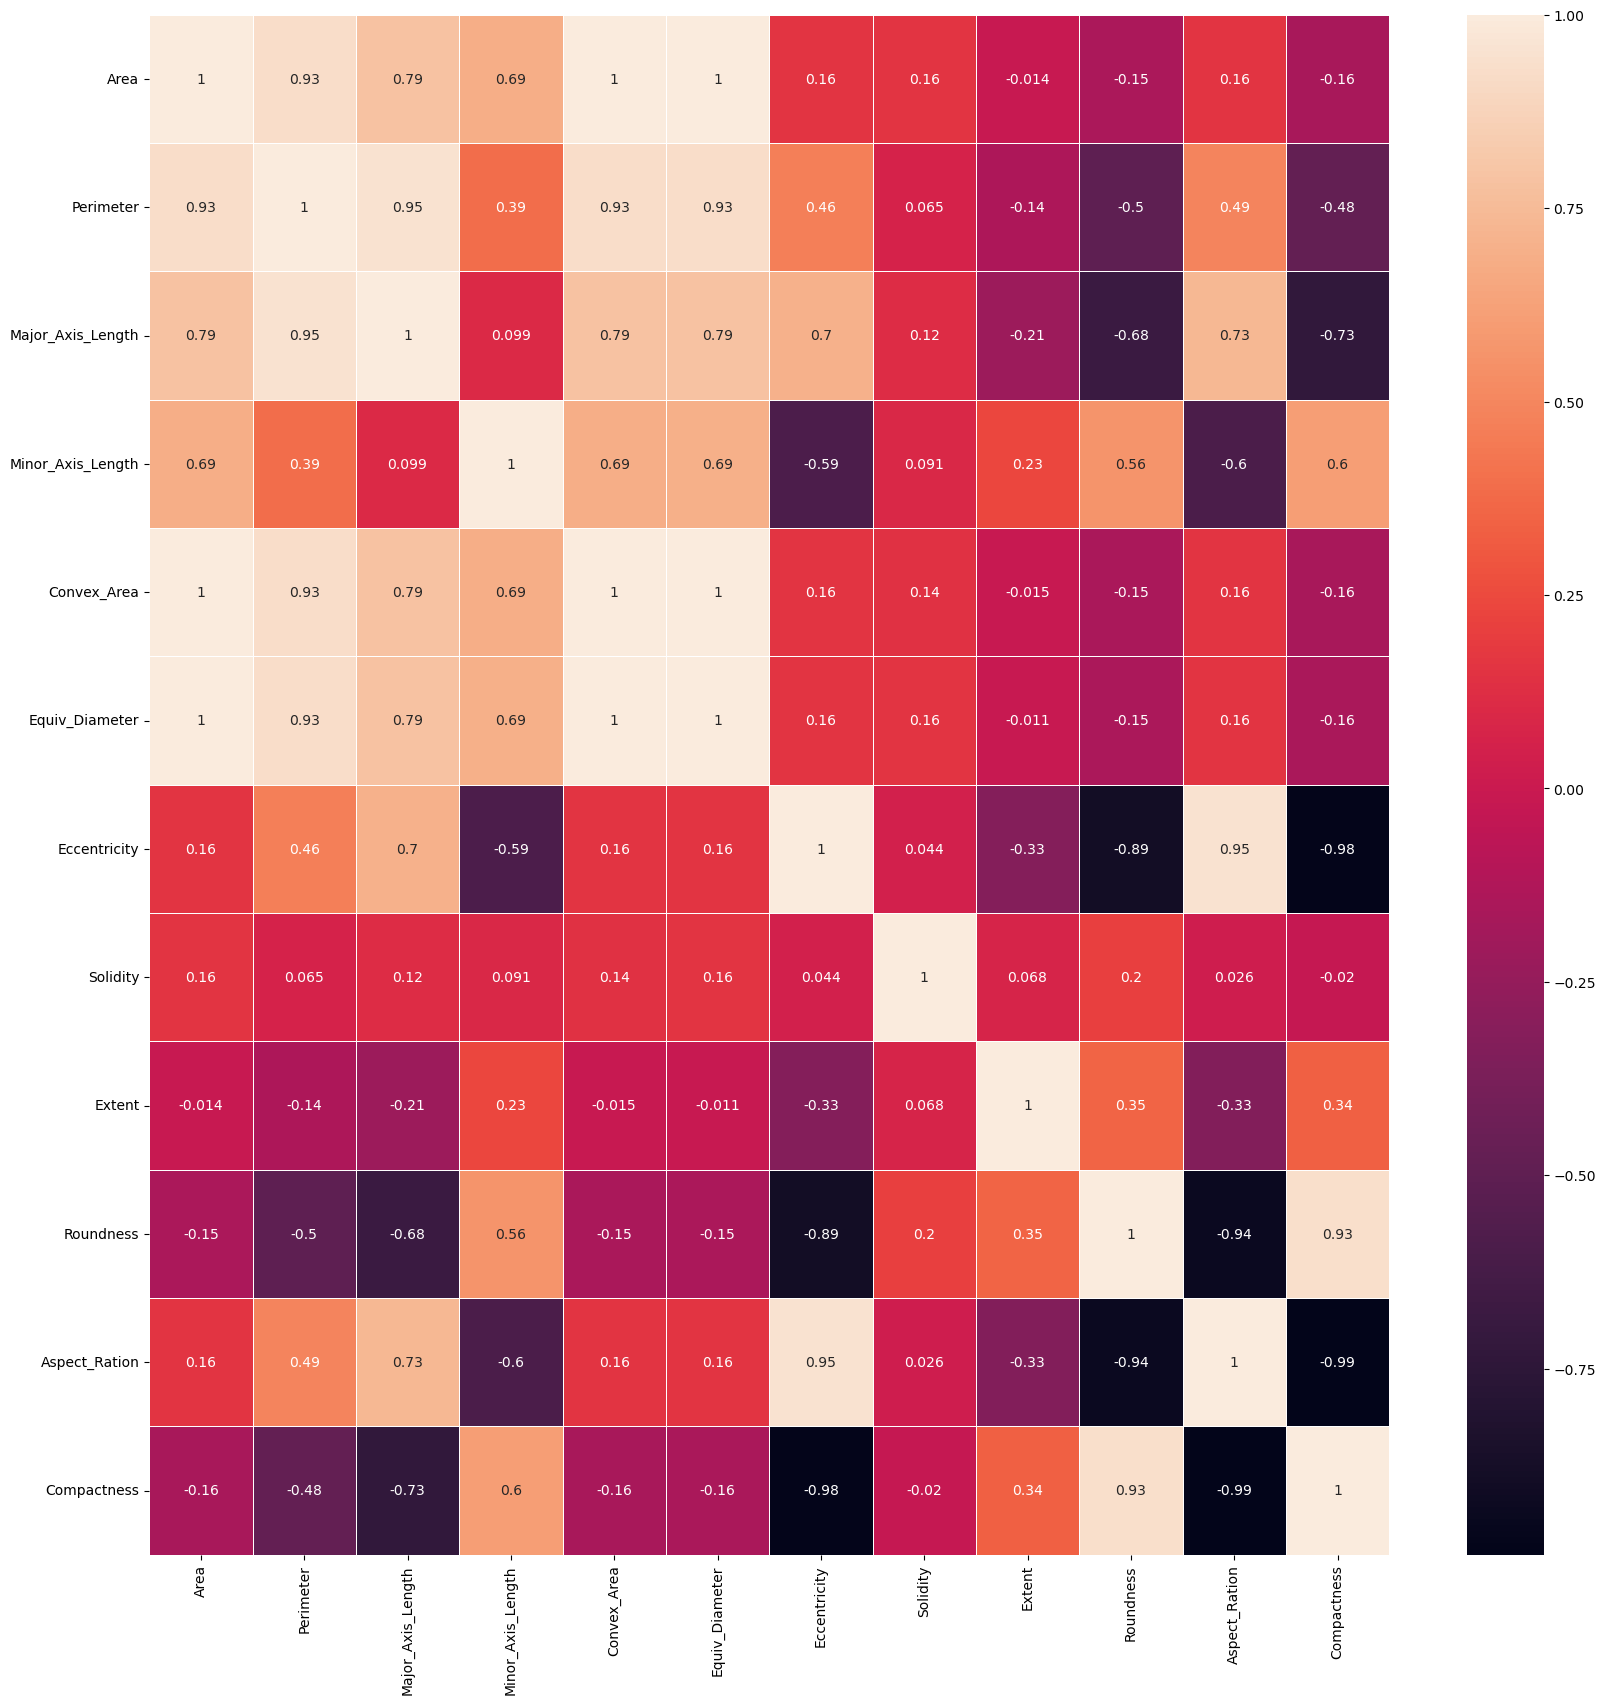

In [10]:
fig, ax = plt.subplots(figsize=(20,20))         
sns.heatmap(dataset.corr(),annot=True, linewidth=.5, ax=ax)

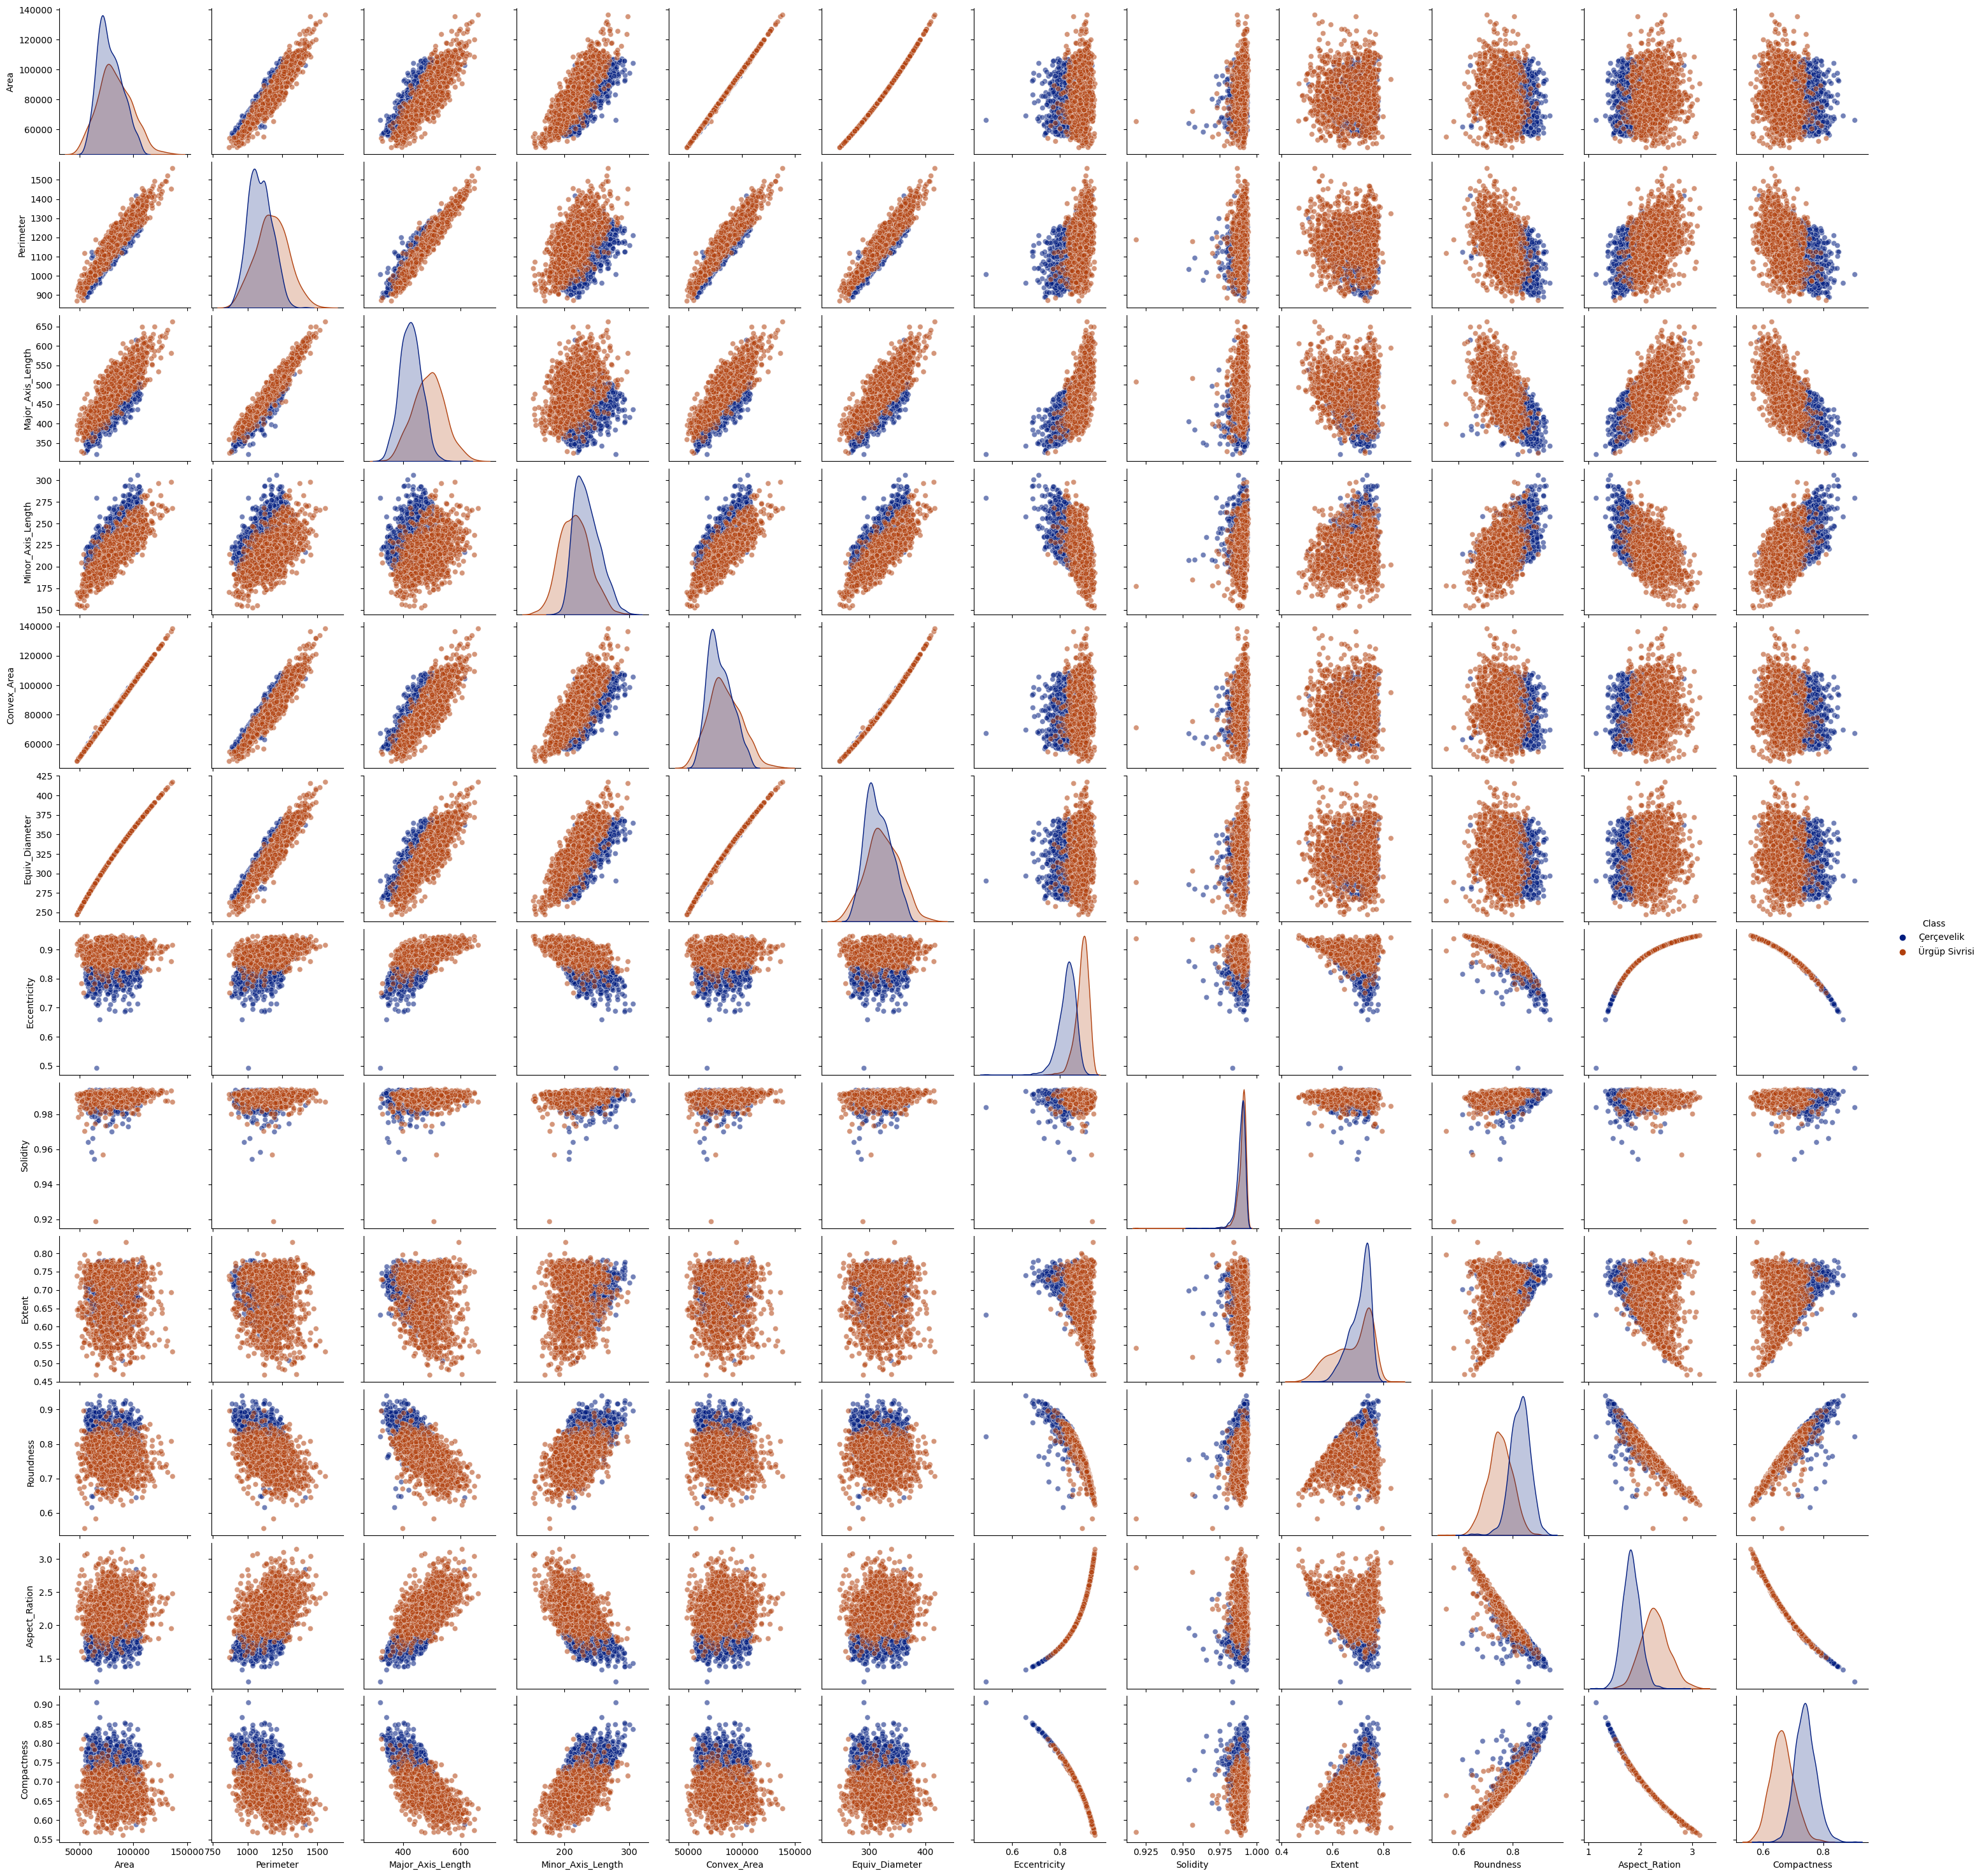

In [11]:
sns.pairplot(dataset,hue="Class",palette="dark",plot_kws=dict(alpha=0.55))

## Step 4: <span id="4" style="color: #4A628A">Split the dataset into dependent/independent variables ✂️ </span>[🔝](#top)

In [12]:
# independent variables
x = dataset.iloc[:,0:-1].values
# dependent variables
y = dataset.iloc[:,-1].values

y = y.reshape(len(y),1)

## Step 5: <span id="5" style="color: #4A628A">Data Preprocessing ✨ </span>[🔝](#top)

### the most commonly used techniques:

1. Label Encoding:

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = onehot_encoder.fit_transform(y.reshape(-1, 1))

2. One-Hot Encoding:

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)

> I will choose the second way

In [15]:
encoded_y

array([0, 0, 0, ..., 1, 1, 1])

Note : Another way to encoded :
```python
# 1 : M and 0 : B
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df['diagnosis'] 
```

## Step 6: <span id="6" style="color: #4A628A">Spliting the dataset into thetraining set and test set 🗃️ </span>[🔝](#top)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,encoded_y,test_size=0.2,
                                                   random_state=0)

## Step 7: <span id="7" style="color: #4A628A">Training the Support Vector Machine (SVM) model on training set 🛠️ </span>[🔝](#top)

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear", random_state=0, max_iter=1000000)
classifier.fit(x_train, y_train)

SVC(kernel='linear', max_iter=1000000, random_state=0)

## Step 8: <span id="8" style="color: #4A628A">Predicting The Test set results 🎯 </span>[🔝](#top)

In [18]:
y_pred = classifier.predict(x_test)

In [19]:
df = pd.DataFrame({'Real Values':y_test.flatten().tolist(), 'Predicted Values':y_pred})
df

Real Values  Predicted Values
0              0                 0
1              1                 1
2              1                 1
3              0                 0
4              0                 0
..           ...               ...
495            1                 1
496            1                 1
497            0                 0
498            1                 0
499            1                 1

[500 rows x 2 columns]

## Step 9: <span id="9" style="color: #4A628A">Visualsing the Training set results 📊 </span>[🔝](#top)

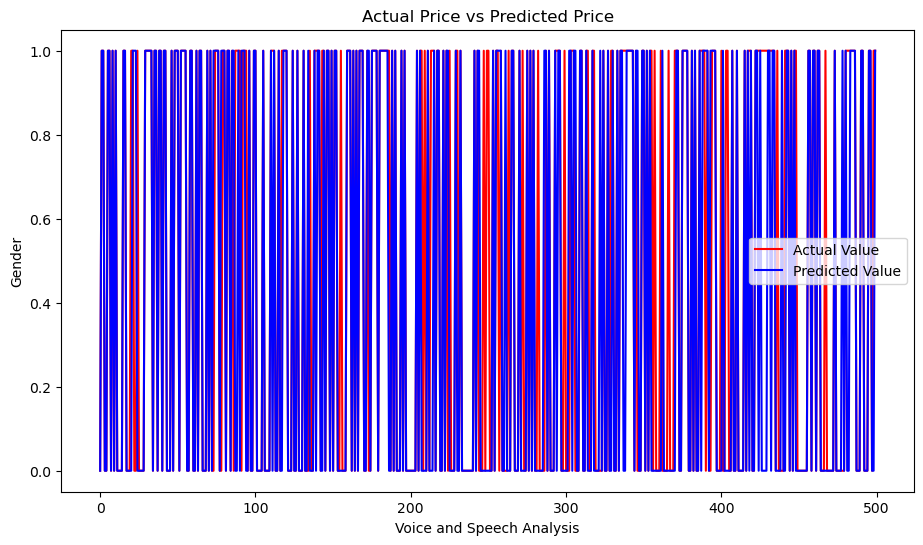

In [20]:
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.show()

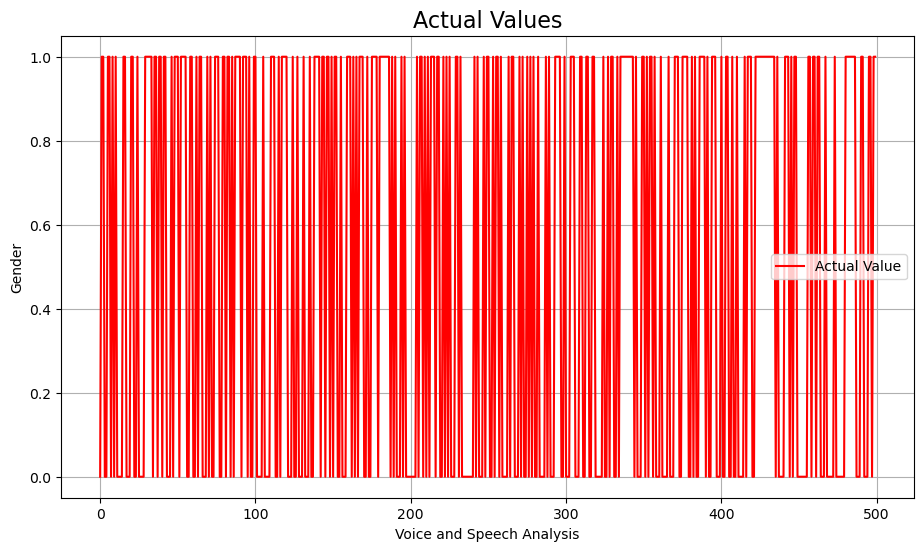

In [21]:
# Plot for Actual Values
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.title('Actual Values', fontsize=16)
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.grid(True)
plt.show()

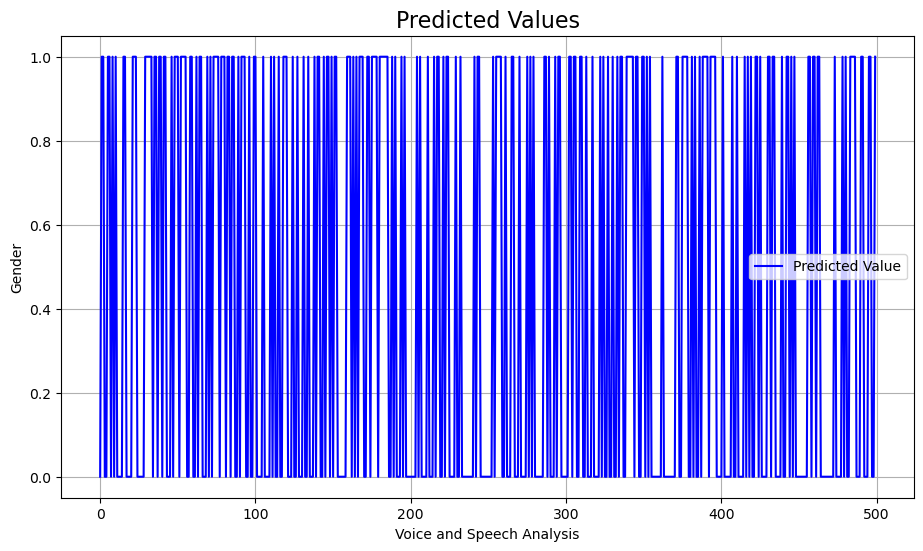

In [22]:
# Plot for Predicted Values
plt.figure(figsize=(11, 6))
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Predicted Values', fontsize=16)
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.grid(True)
plt.show()

## Step 10: <span id="10" style="color: #4A628A">model evaluation ⚡ </span>[🔝](#top)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
print('mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  0.158
mean_absolute_error :  0.158


## Step 11: <span id="11" style="color: #4A628A">Plotting the Confusion Matrix for Classification Results 🌟 </span>[🔝](#top)

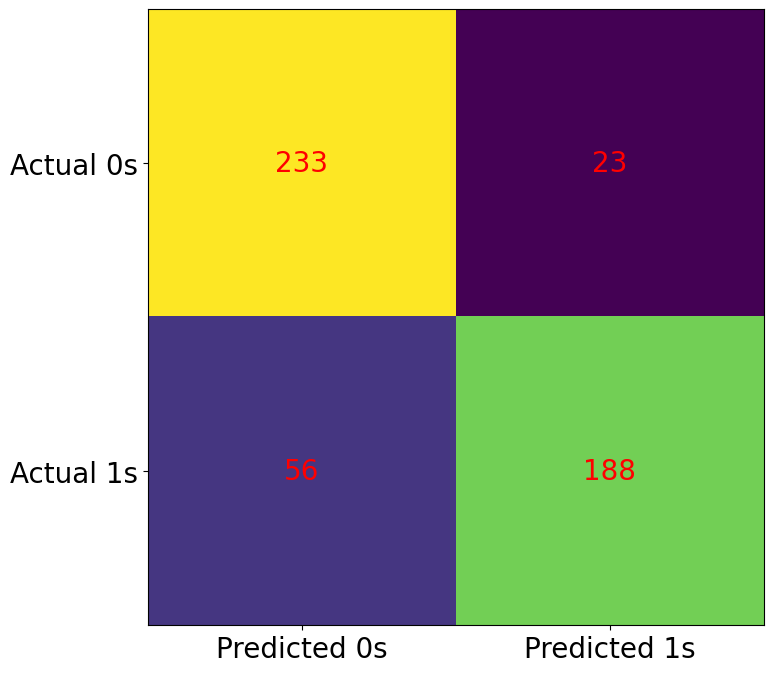

In [24]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test , y_pred)

# Create figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix)
ax.grid(False)

# Set labels for the axes
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))

# Customize the tick label font size
ax.tick_params(axis='both', which='major', labelsize=20)

# Set limits for the vertical axis
ax.set_ylim(1.5, -0.5)

# Add text annotations in each cell of the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red", fontsize=20)

plt.show()

## Step 12: <span id="12" style="color: #4A628A">Calculating and Printing the Accuracy Score 🚀 </span>[🔝](#top)

In [25]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.842


## <a id="13">Sources 📝</a>:<a class='anchor' id='images'></a> [🔝](#top)
----
- scikit-learn.org : https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html
- kaggle : https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset
- Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2024] : https://www.udemy.com/course/machinelearning/?couponCode=2021PM20